In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
training_data = pd.read_csv('./WIPRO.NS.csv')

training_data.shape
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,1.1250,1.1250,1.1250,1.1250,0.919965,19999.0
1,1996-01-02,1.0375,1.0375,1.0375,1.0375,0.848412,39999.0
2,1996-01-03,1.0750,1.0750,1.0750,1.0750,0.879077,19999.0
3,1996-01-04,1.0750,1.0750,1.0750,1.0750,0.879077,119999.0
4,1996-01-05,1.0750,1.0750,1.0750,1.0750,0.879077,0.0


In [3]:
training_data = training_data.iloc[:, 1:2]

training_data.shape

# training_data.head()

(6605, 1)

In [6]:
# feature scaling

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler(feature_range = (0, 1))
training_data = mm.fit_transform(training_data)


In [7]:
# Getting the inputs and outputs

x_train = training_data[0:6604]
y_train = training_data[1:6605]

print(x_train.shape)
print(y_train.shape)


(6604, 1)
(6604, 1)


In [9]:
# reshaping

x_train = np.reshape(x_train, (6604, 1))

print(x_train.shape)

(6604, 1)


In [10]:
# importing the keras libraries and packages

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM


In [8]:
# initializing the model
model = Sequential()

# # adding the input layer and the LSTM layer
# model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
# model.add(Dropout(0.3))
# model.add(LSTM(units=4,return_sequences=True))

model.add(LSTM(50,return_sequences= True, input_shape=))



# adding the output layer
model.add(Dense(units = 1))

# compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fitting the RNN to the training data
model.fit(x_train, y_train, batch_size = 32, epochs = 200)


SyntaxError: invalid syntax (1669410108.py, line 9)

In [7]:
# fitting the RNN to the training data
# model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1,callbacks=[tensorboard_callback])

model.fit(x_train, y_train, batch_size = 64,verbose=1, epochs = 100)

NameError: name 'model' is not defined

In [4]:
# getting the real stock of 2017 i.e., importing the test dataset

test_data = pd.read_csv('./WIPRO.NS.csv')
real_stock_price = test_data.iloc[:,1:2]
real_stock_price.head()
# real_stock_price.shape

,Open
0,1.1250
1,1.0375
2,1.0750
3,1.0750
4,1.0750


In [6]:
# getting the predicted stock price of 2017
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler(feature_range=(0,1))
inputs = real_stock_price
inputs = mm.transform(inputs)
# inputs = np.reshape(inputs, (66, 100, 1))


predicted_stock_price = model.predict(inputs)
predicted_stock_price = mm.inverse_transform(predicted_stock_price)


NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [22]:
predicted_stock_price

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

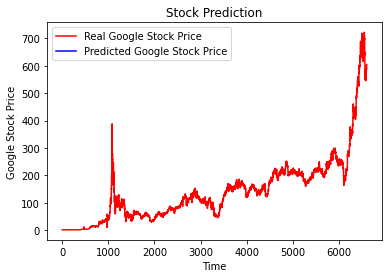

In [23]:
# visualizing the results

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
# getting the real stock price of 2012 - 2016

training_data = pd.read_csv('drive/My Drive/super/Recurrent Neural Networks/Google_Stock_Price_Train.csv')

training_data.shape
training_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
training_data = training_data.iloc[:, 1:2]

training_data.shape
training_data.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [24]:
# getting the predicted stock price of 2012-2016

predicted_stock_price = model.predict(x_train)
predicted_stock_price = mm.inverse_transform(predicted_stock_price)

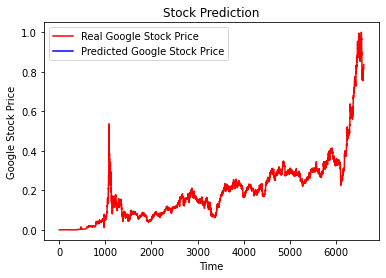

In [25]:
# visualizing the whole training data results

plt.plot(training_data, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
# Evaluating the RNN model

import math

from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

print(rmse)

4.142058509061696
